In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [635]:
#read in the data
df = pd.read_csv('car_prices.csv')

In [636]:
df.head()

,Make,Model,Miles,Year,Exterior Color,Interior Color,Other Info,Price
0,Ford,F-150,"11,918 miles",2019,White,Black,"No accidents, 1 Owner, Personal use","$25,290"
1,Nissan,Titan,93 miles,2019,White,Black,"No accidents, 1 Owner, Personal use","$38,962"
2,Nissan,Titan,"167,325 miles",2010,Gray,Black,"No accidents, 2 Owners, Personal use","$11,999"
3,Chevrolet,Silverado 1500,"14,446 miles",2018,White,Black,"No accidents, 1 Owner, Personal use","$35,990"
4,Ford,F-150,"9,828 miles",2019,White,Gray,"No accidents, 1 Owner, Fleet use","$23,990"


In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8508 entries, 0 to 8507
Data columns (total 8 columns):
Make              8508 non-null object
Model             8508 non-null object
Miles             8508 non-null object
Year              8508 non-null int64
Exterior Color    8508 non-null object
Interior Color    8508 non-null object
Other Info        8508 non-null object
Price             7679 non-null object
dtypes: int64(1), object(7)
memory usage: 531.9+ KB


In [638]:
df.isnull().sum()

Make                0
Model               0
Miles               0
Year                0
Exterior Color      0
Interior Color      0
Other Info          0
Price             829
dtype: int64

In [639]:
#discard entries that do not have a price
df.dropna(axis=0, how='any', inplace=True)

In [640]:
#make ID column
df['ID'] = df.index + 1

In [641]:
df.groupby('Make')['ID'].nunique()

Make
Cadillac            4
Chevrolet        1398
Dodge             166
Ford             2487
GMC               700
Honda              73
Jeep               49
Mazda               2
Mercedes-Benz       4
Nissan            416
Ram              1546
Toyota            834
Name: ID, dtype: int64

In [642]:
df.groupby('Model')['ID'].nunique()

Model
1500                944
1500 Classic        167
2500                338
3500                 72
3500 Chassis Cab     12
                   ... 
Tacoma              571
Titan               183
Titan XD             25
Transit Cutaway       1
Tundra              263
Name: ID, Length: 68, dtype: int64

In [643]:
df['Model'].nunique()

68

In [644]:
df.groupby('Exterior Color')['ID'].nunique()

Exterior Color
Beige        12
Black      1263
Blue        494
Brown        92
Copper        1
Gold         46
Gray       1166
Green        78
Maroon       32
Orange       20
Red         775
Silver      872
Tan          34
Unknown     276
White      2509
Yellow        9
Name: ID, dtype: int64

In [645]:
df.groupby('Interior Color')['ID'].nunique()

Interior Color
Beige       277
Black      3432
Blue         12
Brown       239
Gray       2432
Green         1
Orange        4
Red          29
Unknown    1249
White         4
Name: ID, dtype: int64

In [646]:
#change values in miles column to numeric
df['Miles'] = df['Miles'].str.extract('(\\d+?,?\d+)\\s*((miles))')[0].str.replace(',','')
df['Miles'] = pd.to_numeric(df['Miles'],errors='coerce')

In [647]:
#change values in years column to numeric
df['Price'] = df['Price'].str.extract('(\s?[0-9,]+(\.[0-9]{2})?)')[0].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [656]:
#unpacking information about accidents
other_info = list(df['Other Info'].str.split(','))
accidents = []

for i in range(len(other_info)):
    accidents.append(other_info[i][0][0])
    
df['Accidents'] = accidents
accidents = {}

for i, accident in enumerate(df['Accidents'].value_counts().index):
    accidents[accident] = i
    
df.replace(accidents, inplace=True)

In [665]:
#continue unpacking info about previous owners
owners = []
for i in range(len(other_info)):
    if other_info[i][1][1].isdigit():
        owners.append(other_info[i][1][1])
    else:
        owners.append('1') # if number of previous owners is not specified then default and set it to one
df['Number of Owners'] = owners
df['Number of Owners'] = pd.to_numeric(df['Number of Owners'], errors='coerce')

In [660]:
#unpack information about usage
usage = []
for i in range(len(other_info)):
    try:
        usage.append(other_info[i][2])
    except IndexError:
        usage.append(other_info[i][1])
df['Usage'] = usage

In [661]:
df.groupby('Usage')['ID'].nunique()

Usage
 Fleet use        857
 Personal use    6822
Name: ID, dtype: int64

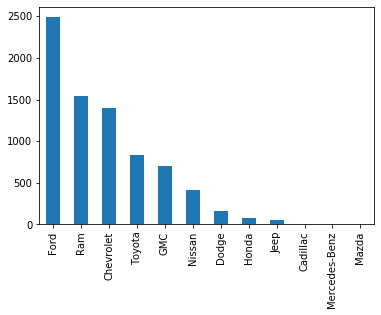

In [662]:
df['Make'].value_counts().plot(kind='bar')

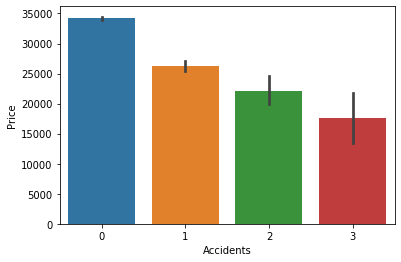

In [663]:
sns.barplot(x='Accidents', y='Price', data=df)

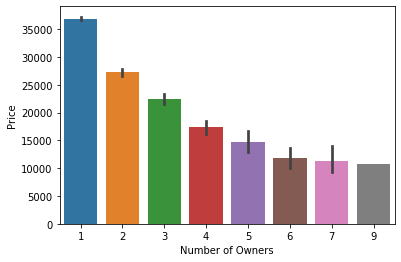

In [666]:
sns.barplot(x='Number of Owners', y='Price', data=df)

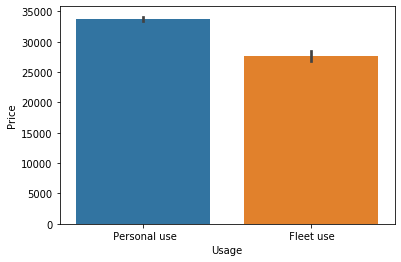

In [667]:
sns.barplot(x='Usage', y='Price', data=df)

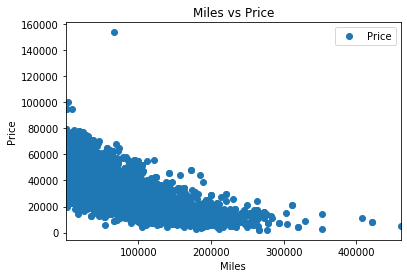

In [668]:
df.plot(x='Miles',y='Price',style='o')
plt.title('Miles vs Price')
plt.xlabel('Miles')
plt.ylabel('Price')
plt.show()

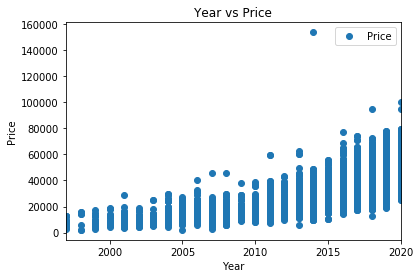

In [669]:
df.plot(x='Year',y='Price',style='o')
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

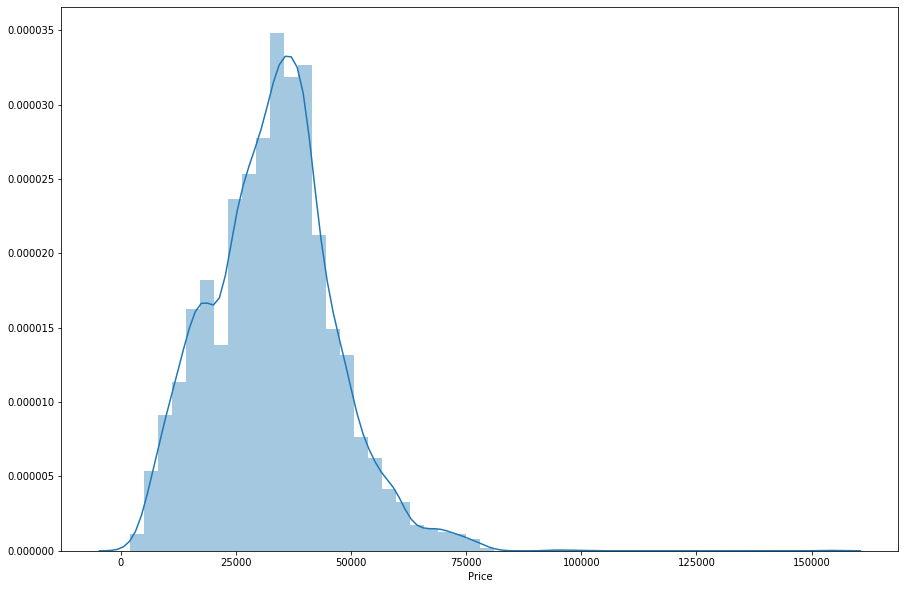

In [670]:
#visualizing the distribution of car prices
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Price'])
plt.show()

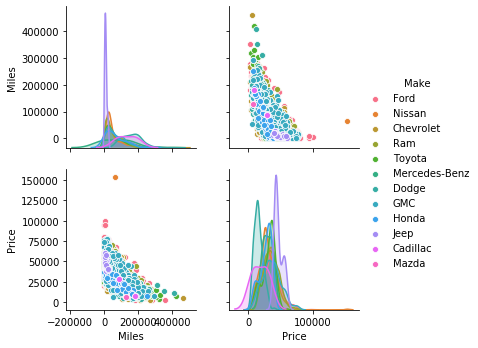

In [673]:
sns.pairplot(df[['Miles', 'Price', 'Make']], hue='Make')
plt.show()

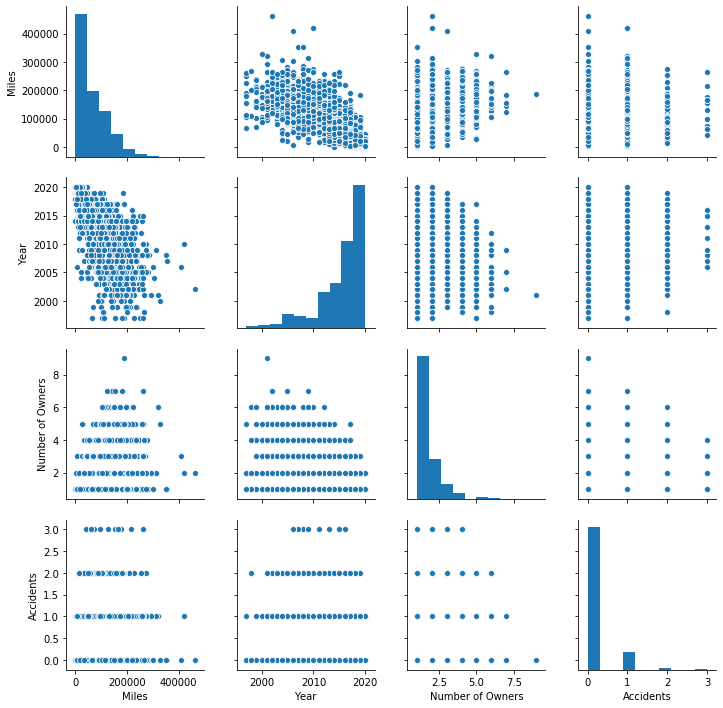

In [679]:
sns.pairplot(df[['Miles', 'Year', 'Number of Owners', 'Accidents']])

In [680]:
#change make, model, usage, and color to numeric values
makes = {}
ext_color = {}
int_color = {}
models = {}

for i, make in enumerate(df['Make'].value_counts().index):
    makes[make] = i
    
for i, color in enumerate(df['Exterior Color'].value_counts().index):
    if color == 'Unknown':
        ext_color[color] = 0 # if color is unknown set it to 0 which is most common color
    else:
        ext_color[color] = i
    
for i, color in enumerate(df['Interior Color'].value_counts().index):
    if color == 'Unknown':
        int_color[color] = 0 # if color is unknown set it to 0 which is most common color
    else:
        int_color[color] = i

for i, truck in enumerate(df['Model'].value_counts().index):
    models[truck] = i
    
df.replace(makes, inplace=True)
df.replace(ext_color, inplace=True)
df.replace(int_color, inplace=True)
df.replace(models, inplace=True)
df.replace({'Usage':{' Fleet use': 0, ' Personal use': 1}}, inplace=True)

In [694]:
df.drop(['Other Info'], axis=1, inplace=True)

In [695]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [699]:
X, y = df.drop(['Price', 'Interior Color'], axis=1), df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [700]:
#linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [708]:
pred1 = lr.predict(X_test)

In [701]:
lr.score(X_test, y_test)

0.5716220603684161

In [702]:
#decision tree regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [709]:
pred2 = dt_reg.predict(X_test)

In [703]:
dt_reg.score(X_test, y_test)

0.6617286811872334

In [705]:
#random forest regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [740]:
pred3 = rf_reg.predict(X_test)

In [741]:
rf_reg.score(X_test, y_test)

0.7979028403283279

In [742]:
results = pd.DataFrame({'Linear Regression': pred1, 'Decision Tree Regressor': pred2, 
                            'Random Forest Regressor': pred3, 'Actual': y_test})

In [743]:
results

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,Actual
2219,35243.273016,35100.0,41433.12,29990
6119,30806.763891,19990.0,22264.66,26888
2743,36051.207640,33995.0,34656.03,34980
3066,17542.238817,18500.0,17846.25,18500
5091,11974.454696,11579.0,13073.38,14999
...,...,...,...,...
4135,36133.775392,43997.0,42673.27,40995
8228,44143.503946,55610.0,49808.94,49811
4881,40969.684031,29000.0,24919.03,30597
5981,40636.605903,28000.0,27648.79,30899


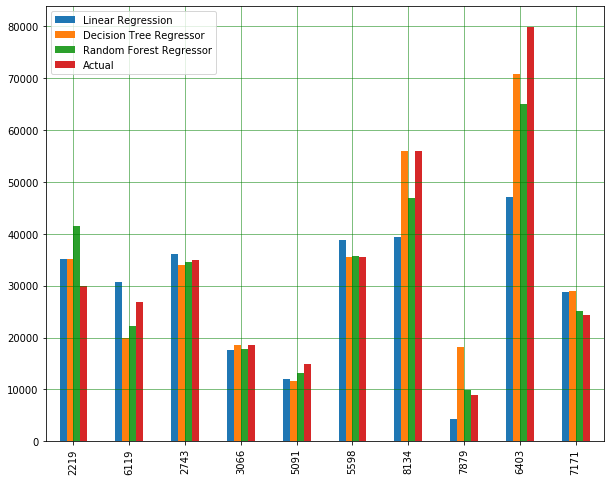

In [744]:
results.head(10).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [745]:
print('Errors for Linear Regression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)),'\n')

print('Errors for Decision Tree Regressor')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)),'\n')

print('Errors for Random Forest Regressor')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)),'\n')

Errors for Linear Regression
Mean Absolute Error: 6450.897429207955
Mean Squared Error: 79451350.93392865
Root Mean Squared Error: 8913.548728420608 

Errors for Decision Tree Regressor
Mean Absolute Error: 4831.249565972223
Mean Squared Error: 62739256.09939236
Root Mean Squared Error: 7920.811580854096 

Errors for Random Forest Regressor
Mean Absolute Error: 3954.959422743056
Mean Squared Error: 37483004.77291984
Root Mean Squared Error: 6122.336545218651 

